# Movie's Data Analysis

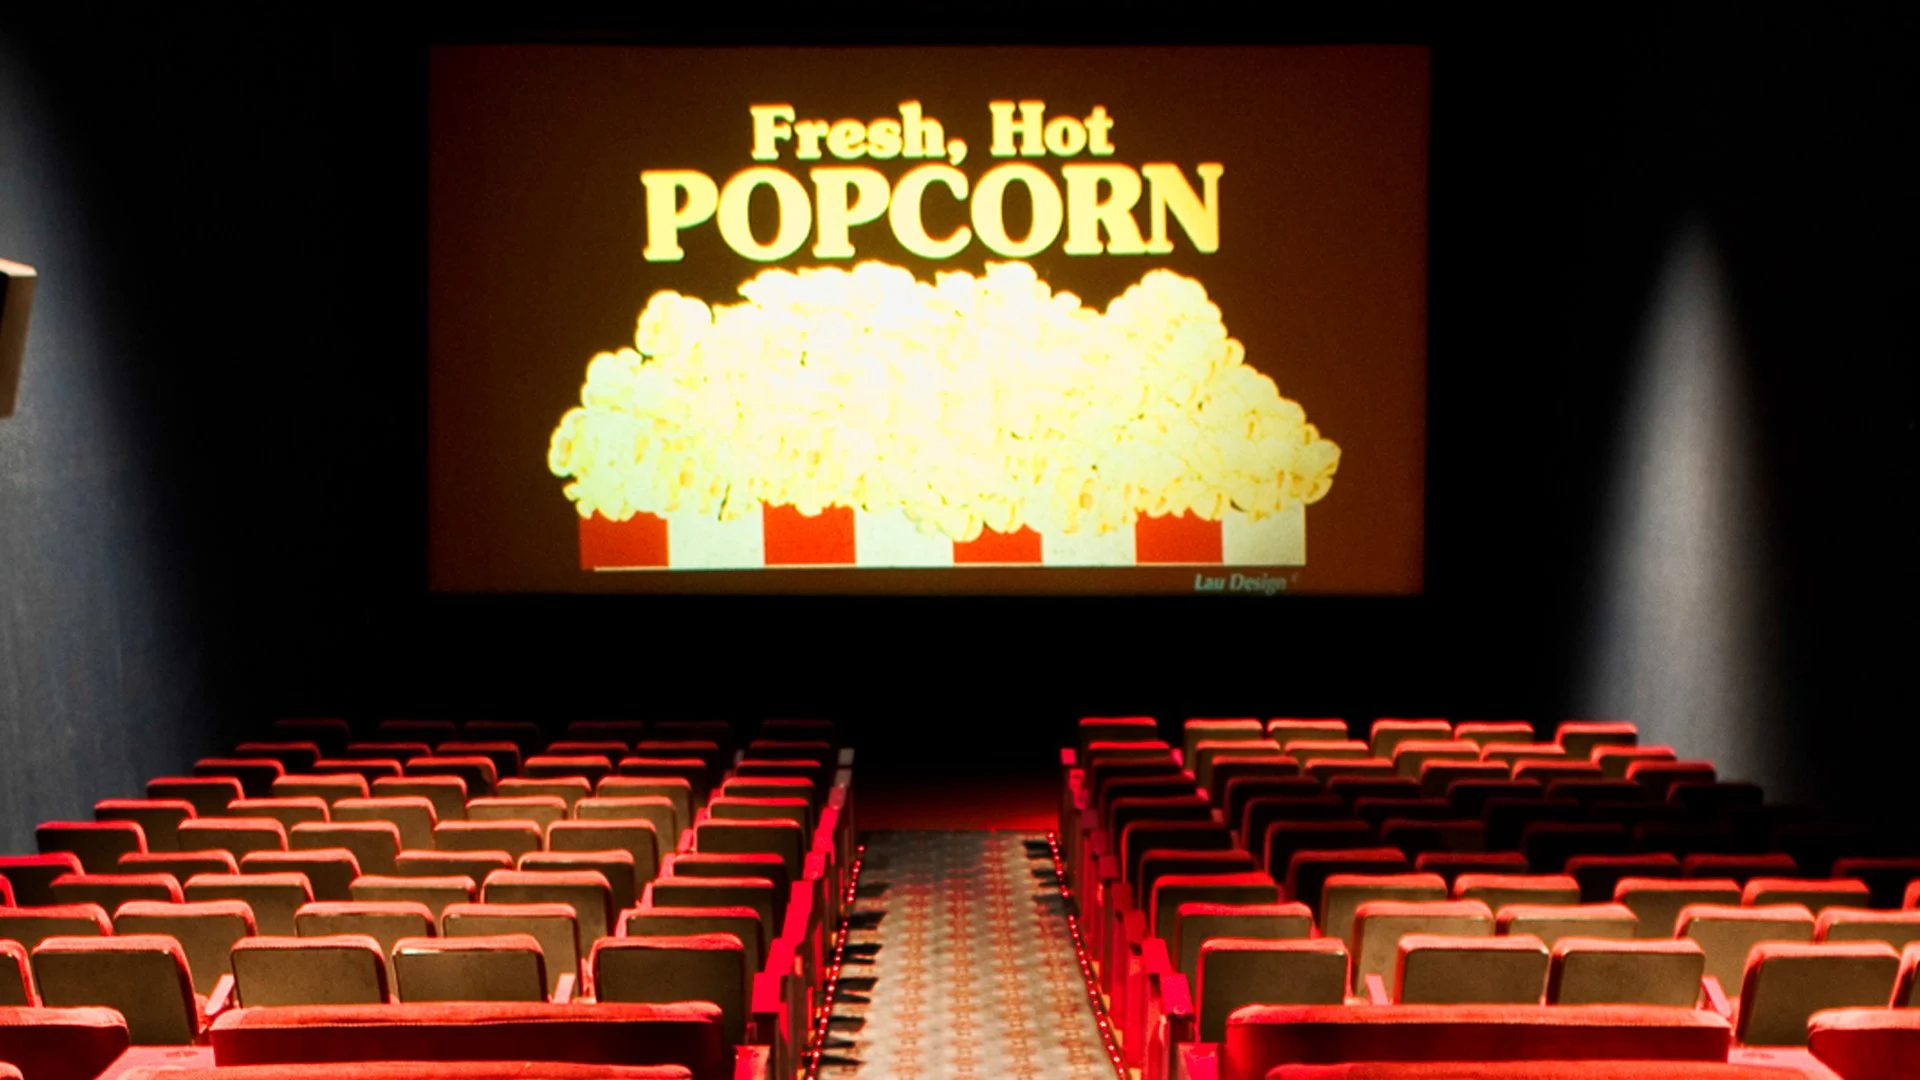

In [1]:
#necessary Libraries 

import sqlite3 
import pandas as pd
import numpy as np

In [2]:
#Make the connection with the db

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [3]:
#select all the data from the movie basics table

pd.read_sql("""SELECT *
from movie_basics

ORDER BY MOVIE_ID;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
#select all the data from the movie basics table

pd.read_sql("""SELECT * FROM movie_ratings

ORDER BY MOVIE_ID;""", conn)

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [5]:
#select all the data from the movie akas table

pd.read_sql("""SELECT * FROM movie_akas

ORDER BY MOVIE_ID;""", conn)

#we can see that we have a lot of empty data so if we're going to use this table we need to clean it

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...
331698,tt9915436,1,Life in Movement,US,None,alternative,None,0.0
331699,tt9915436,2,Vida em Movimento,None,None,original,None,1.0
331700,tt9916170,1,O Ensaio,BR,None,None,None,0.0
331701,tt9916170,2,The Rehearsal,XWW,en,imdbDisplay,None,0.0


In [6]:
#We select all the movies with a data for the language column

pd.read_sql("""SELECT * FROM movie_akas where language IS NOT NULL ;""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
2,tt0369610,28,Monde jurassique,CA,fr,imdbDisplay,None,0.0
3,tt0369610,35,Jurassic Park 4,TR,tr,None,informal alternative title,0.0
4,tt0369610,43,Jurassic World,TR,tr,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
41710,tt9657946,1,Homing,XWW,en,imdbDisplay,None,0.0
41711,tt9726638,1,Qi Tian Da Sheng 2,CN,yue,imdbDisplay,None,0.0
41712,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
41713,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0


In [7]:
#select all the movies with a data for US region since this is the data that is important to us

pd.read_sql("""SELECT * FROM movie_akas where region = 'US' ;""",conn)

#we can see that the language is empty, this might be because its implied that the language is English due to the region

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
1,tt0369610,29,Jurassic World,US,None,None,None,0.0
2,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
4,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
51485,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,None,imdbDisplay,None,0.0
51486,tt9358044,2,Hail Satan?,US,None,imdbDisplay,None,0.0
51487,tt9562694,5,Alien Warfare,US,None,imdbDisplay,None,0.0
51488,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,None,imdbDisplay,None,0.0


In [8]:
#we get the median for the number of votes

pd.read_sql("""SELECT numvotes
FROM movie_ratings
ORDER BY numvotes
LIMIT 1
OFFSET (SELECT COUNT(*)
        FROM movie_ratings) / 2""", conn)


,numvotes
0,49


In [9]:
#get the average votes

pd.read_sql("""SELECT AvG(numvotes)
FROM movie_ratings;""", conn)


,AvG(numvotes)
0,3523.662167


In [10]:
#we get the important info for the movies that are from the us region

pd.read_sql("""SELECT MB.movie_id, primary_title, runtime_minutes, genres, averagerating, numvotes, region
FROM movie_basics MB 
    JOIN movie_ratings MR
        ON MB.movie_id = MR.movie_id
            JOIN movie_akas MA 
                ON MR.movie_id = MA.movie_id
                GROUP BY MB.movie_id
                    HAVING MA.region = 'US' 
                        ORDER BY numvotes DESC;""", conn)

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,region
0,tt2170667,Wheels,115.0,Drama,9.3,17308,US
1,tt1864288,Conan O'Brien Can't Stop,89.0,"Comedy,Documentary,Music",7.0,5871,US
2,tt2974050,Cool Cat Saves the Kids,75.0,"Crime,Family,Horror",4.5,4841,US
3,tt3526810,Adolf Hitler: The Greatest Story Never Told,350.0,"Biography,Documentary,History",7.9,4780,US
4,tt3097084,Camp Takota,95.0,Comedy,6.9,4393,US
...,...,...,...,...,...,...,...
13849,tt1260563,Bridge of Names,95.0,Drama,5.2,5,US
13850,tt1237836,Archangel Alpha,NaN,"Action,Romance,Sci-Fi",6.8,5,US
13851,tt1220638,Get Real! Wise Women Speak,NaN,Documentary,7.2,5,US
13852,tt1196952,Phil Cobb's Dinner for Four,81.0,"Comedy,Drama",8.0,5,US


In [11]:
pd.read_sql("""SELECT movie_id ,AVG(numvotes) as avvotes
FROM movie_ratings
GROUP BY movie_id
HAVING numvotes > AVG(numvotes)

ORDER BY MOVIE_ID""", conn)

,movie_id,avvotes


In [12]:
conn.close()

# Movie's Budgets

In [13]:
# we load the csv and save it in a Dataframe

budgets = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [14]:
budgets.info()

#we can see that there are 0 not null data, but in the cell above we can see 0 values
#We also see the datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
#we change the dtype of the date to a datetime so we can split the year and month of each movie

budgets["release_date"] = pd.to_datetime(budgets["release_date"])

In [16]:
#we create a column named month and year so we can save that in the dataframe
budgets['month'] = budgets["release_date"].dt.month_name()

budgets['year'] = budgets["release_date"].dt.year
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,December,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",April,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",July,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,September,2015


In [17]:
#we clean the worlwide gross column so we can sum the values

budgets['worldwide_gross'] = budgets.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)

In [18]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625",2.776345e+09,December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,0.000000e+00,December,2018
5778,79,1999-04-02,Following,"$6,000","$48,482",2.404950e+05,April,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338",1.338000e+03,July,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,0.000000e+00,September,2015


In [19]:
# we filter the data to get relevant information
recent_movies =  budgets.query("year >= 2012").iloc[:1400]
recent_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2.053311e+09,December,2015
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09,April,2018
...,...,...,...,...,...,...,...,...
5044,45,2015-12-18,Saul fia,"$1,700,000","$1,777,043",9.696537e+06,December,2015
5047,48,2019-02-01,Braid,"$1,660,000",$0,8.074500e+04,February,2019
5059,60,2014-09-26,Two Night Stand,"$1,600,000","$15,600",8.680810e+05,September,2014
5063,64,2016-10-21,Moonlight,"$1,500,000","$27,854,931",6.524551e+07,October,2016


In [20]:
recent_movies.count()

id                   1400
release_date         1400
movie                1400
production_budget    1400
domestic_gross       1400
worldwide_gross      1400
month                1400
year                 1400
dtype: int64

In [21]:
#we grouped the data by moth so we can have the worldwide gross per month

grouped_recent = recent_movies.groupby('month')

In [22]:
#we get the amount of movies made per month
grouped_recent['id'].sum()

month
April        4909
August       5617
December     8614
February     6102
January      5537
July         5099
June         5751
March        6434
May          4866
November     5975
October      6550
September    5545
Name: id, dtype: int64

In [23]:
#the sum of the gross per month
grouped_recent['worldwide_gross'].sum()

month
April        1.251088e+10
August       1.040229e+10
December     2.290977e+10
February     1.358781e+10
January      7.887159e+09
July         2.146751e+10
June         2.292101e+10
March        1.774840e+10
May          2.257021e+10
November     2.462244e+10
October      1.030930e+10
September    9.087185e+09
Name: worldwide_gross, dtype: float64

In [24]:
#the mean of the gross per month ordered
grouped_recent['worldwide_gross'].mean().sort_values(ascending=False)

month
May          2.257021e+08
July         2.213145e+08
June         2.122316e+08
November     1.938774e+08
December     1.414183e+08
March        1.344576e+08
February     1.235255e+08
April        1.214648e+08
August       9.543388e+07
October      8.054144e+07
January      7.583807e+07
September    7.572654e+07
Name: worldwide_gross, dtype: float64